In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle 
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import re
import seaborn as sns 
from collections import Counter 
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [46]:
import numpy as np

# EDA 

In [10]:
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = 'k' ##909090
plt.rcParams['axes.labelcolor']= 'k'
plt.rcParams['xtick.color'] = 'k'
plt.rcParams['ytick.color'] = 'k'
plt.rcParams['font.size']=13

In [11]:
def predict_labels(reviews_df_):
    """this function takes the dataframe and returns the predicted labels for each review"""
    
    clean_reviews(reviews_df_)
    tfidf_vctrr= TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
    tfidf_features = tfidf_vctrr.fit_transform(reviews_df_["Full Text Reviews "]).toarray()
    predicted_labels = model.predict(tfidf_features)
    #reviews_df_["Labels"]=predict_labels
    
    return predicted_labels

In [12]:
def clean_reviews(reviews_df):
    """this function takes the original dataframe and convert the reviews to lowercase, remove symobls and stop words"""
    reviews_df['Full Text Reviews '] = reviews_df['Full Text Reviews '].apply(lambda x: " ".join(x.lower() for x in x.split()))
    reviews_df['Full Text Reviews '] = reviews_df['Full Text Reviews '].str.replace('[^\w\s]','') 
    stop = stopwords.words('english')
    reviews_df['Full Text Reviews ']= reviews_df['Full Text Reviews '].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
    
    return reviews_df
    

In [13]:
def clean_data(data_):
    """this fuction remove unwanted chars, symbols,stop words, emojis...etc from sentences 
    then returns a cleaned dataframe with tokenized reviews"""
    
    for i in range(len(data_["Full Text Reviews "])):
        print(i)
        b=str(data_["Full Text Reviews "][i])
        b=b.lower()
        #b=remove_pattern(b, "@[\w]*")
        #b=strip_emoji(b)
        b=re.sub(r'\b\w{1,4}\b', '', b)
        b=re.sub('[^\w]', ' ',b)
        #b.replace("[^a-zA-Z#]", " ")
        #b.replace("http'", "")
        b=stop_words_remove(b)
        print(b)
        
        print("XXX")
        data_["Full Text Reviews "][i]=str(b)
        print(data_["Full Text Reviews "][i])
        
    return data_

In [14]:
def stop_words_remove(sent):
    """this fuction removes stop words from sentences 
    then returns cleaned sentence"""
      
    stop_words = set(stopwords.words('english')) 

    word_tokens = word_tokenize(sent) 

    filtered_sentence = [w for w in word_tokens if not w in stop_words] 

    filtered_sentence = [] 

    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(w) 

    return filtered_sentence

In [15]:
def percentage(part,total):
    """ this function calculates the percentage of the given parameter (part)"""
    
    return np.round((part/total)*100)

In [16]:
def Label_percentage(dataf):
    """this function takes dataframe then returns the percentage of each sentiment """
    label_count=dataf.groupby("label")["label"].count()
    negative_perc=percentage(label_count[-1],len(dataf['label']))
    neutral_perc=percentage(label_count[0],len(dataf['label']))
    positive_perc=percentage(label_count[1],len(dataf['label']))
    
    return positive_perc,negative_perc,neutral_perc

In [17]:
def Pie_chart(positive_,negative_,neutral_,title):
    """ a funcation that takes positive,negative,neutral values to plot a pie chart """
    
    labels=["Positive ["+str(round(positive_,2))+"%]","Negative ["+str(round(negative_,2))+"%]","Neutral ["+str(round(neutral_,2))+"%]"]
    sizes=[positive_,negative_,neutral_]
    color=["yellowgreen","red","gold"]
    
    patches,text=plt.pie(sizes,[.1,0,0],colors=color,startangle=90,pctdistance=.6,labeldistance=.5,)
    plt.legend(patches,labels,loc="best", bbox_to_anchor=(1.5,0.8))
    plt.title(title)

In [18]:
def Pie_chart2(positive,negative,neutral,title):
    """ a funcation that takes positive,negative,neutral values to plot a pie chart """
    
    labels=["Positive","Negative ","Neutral"]
    sizes=[positive,negative,neutral]
    color=["green","tomato","gold"]
    
    fig, ax = plt.subplots()
    ax.set_title(title)
    ax.pie(sizes,[.1,0,0],colors=color,autopct='%1.0f%%',
    startangle=90, pctdistance=.8)
    ax.axis('scaled')
    ax.legend(labels,frameon=True, bbox_to_anchor=(1,0.8))

In [19]:
def word_cloud(data_,sent_):
    
    """this function takes the dataframe and the sentiment(positive,negative or neutral 
    then plot its most frequent words as a word cloud)"""
    
    normal_words =' '.join([text for text in data_['Full Text Reviews '][data_['label'] == sent_]])
    #normal_words_=pd.Series(' '.join(data_['Full Text Reviews ']).split())
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
    #plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.title("Positive most freuqent words")
    plt.show()
    
    return plt

In [20]:
def words_freq_plot_sent(data_,sentiment_):
    """this function takes the dataframe and the sentiment(positive,negative or neutral 
    then plot its top 7 frequent words as a bar plot"""
    if sentiment_==-1:
        pallette="gist_heat"
    elif sentiment_==1:
        pallette="Greens_r"  
    else:
        pallette="summer"   
        

    sent_text=data_[data_["label"]==sentiment_]
    #print(sent_text)
    #print(sentiment_)
    fdist_sent = FreqDist(sent_text["Full Text Reviews "])
    top_ten_sent = fdist_sent.most_common(7)
    data_sent = top_ten_sent
    names_, values_ = zip(*data_sent)
    values_=list(values_)
    #print(top_ten_sent)
    
    dict_vis_={}
    #print(dict_vis_)
    x=0
    for i in names_:
        dict_vis_[i]=values_[x]
        x+=1
    #print(dict_vis_)
    sent_words_df=pd.DataFrame(dict_vis_,index=["freq"])
    sent_words_df.transpose()
    fig2, ax2 = plt.subplots(figsize=(9, 6))
    ax2 = sns.barplot(data=sent_words_df,palette=pallette,orient='h')
    ax2.set(xlabel='Count', ylabel='most Frequent words',title="Positive Top 7 freuqent words")
    plt.show()
    
    return fig2

In [21]:
#open the original Dataframe 
data=pd.read_excel(r"data//original_data")


In [23]:
#open the model 
with open(r"model//model.pickle","rb") as f:
    model=pickle.load(f)

D:\programs\anaconda\lib\site-packages\sklearn\base.py:306: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.21.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
D:\programs\anaconda\lib\site-packages\sklearn\base.py:306: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.20.3 when using version 0.21.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [25]:
data.head()

Purchased Reviews  Recommended Reviews  Rating of Reviews  \
0                1.0                  1.0                  5   
1                NaN                  NaN                  5   
2                0.0                  1.0                  5   
3                0.0                  1.0                  5   
4                0.0                  1.0                  5   

                                  Full Text Reviews   \
0                A sweet smooth taste in every drop.   
1  This is a terrific product. Just a few drops i...   
2  Best Food on market. Mans Food. Leaves Hoppy a...   
3  Great refreshing taste! Not a weak Food. Safe ...   
4  I purchased this item to make Mimosas and had ...   

                          Title of Reviews   
0  I love the sweet smooth muscadine taste.  
1                                Delicious!  
2                   Hoppy! Best Hoppy Food.  
3                           Love This Brew!  
4                      Actually Quite Tasty

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1231 entries, 0 to 1230
Data columns (total 5 columns):
Purchased Reviews      725 non-null float64
Recommended Reviews    622 non-null float64
Rating of Reviews      1231 non-null int64
Full Text Reviews      1230 non-null object
Title of Reviews       1193 non-null object
dtypes: float64(2), int64(1), object(2)
memory usage: 48.2+ KB


In [34]:
#there are nan values in Purchased Reviews & Recommended Reviews 
#so we will fill it with mean or median or mode 

In [35]:
# we will find the sentiment for each entry in "Full Text Reviews" column
#there are no nan values in "Full Text Reviews" column, 
#so no further action will be taken 

D:\programs\anaconda\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
D:\programs\anaconda\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


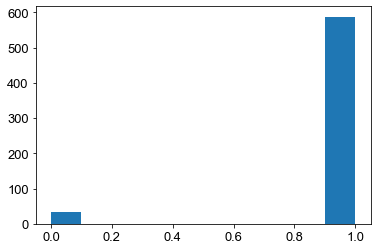

In [27]:
_=plt.hist(data["Recommended Reviews"])

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1231 entries, 0 to 1230
Data columns (total 5 columns):
Purchased Reviews      725 non-null float64
Recommended Reviews    622 non-null float64
Rating of Reviews      1231 non-null int64
Full Text Reviews      1230 non-null object
Title of Reviews       1193 non-null object
dtypes: float64(2), int64(1), object(2)
memory usage: 48.2+ KB


In [29]:
#finding the mode of "Recommended Reviews" column 
data["Recommended Reviews"].mode()

0    1.0
dtype: float64

In [30]:
#replacing nan values with the mode 
data["Recommended Reviews"].fillna(value=1, inplace=True)

In [31]:
#finding the median of "Purchased Reviews" column 
data["Purchased Reviews"].mode()

0    0.0
dtype: float64

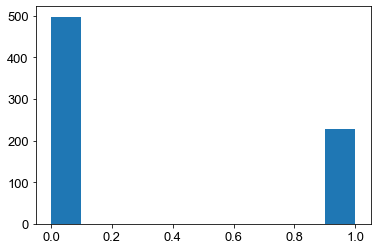

In [32]:
#ploting histogram of "Purchased Reviews" column 
_=plt.hist(data["Purchased Reviews"])

In [33]:

data["Purchased Reviews"].fillna(value=0, inplace=True)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1231 entries, 0 to 1230
Data columns (total 5 columns):
Purchased Reviews      1231 non-null float64
Recommended Reviews    1231 non-null float64
Rating of Reviews      1231 non-null int64
Full Text Reviews      1230 non-null object
Title of Reviews       1193 non-null object
dtypes: float64(2), int64(1), object(2)
memory usage: 48.2+ KB


In [35]:
#dropping nan values from "Full Text Reviews " column 
data.dropna(subset=["Full Text Reviews "],inplace=True)

In [36]:
#predicting labels (sentiment) for "Full Text Reviews " column
pred_labels=predict_labels(data)

In [37]:
#adding "label" column filled with the predicted (labels) sentiments 
data["label"]=pred_labels

In [38]:
#the column is added successfully 
data.columns

Index(['Purchased Reviews', 'Recommended Reviews', 'Rating of Reviews',
       'Full Text Reviews ', 'Title of Reviews ', 'label'],
      dtype='object')

In [39]:
data.head()

Purchased Reviews  Recommended Reviews  Rating of Reviews  \
0                1.0                  1.0                  5   
1                0.0                  1.0                  5   
2                0.0                  1.0                  5   
3                0.0                  1.0                  5   
4                0.0                  1.0                  5   

                                  Full Text Reviews   \
0                      sweet smooth taste every drop   
1  terrific product drops food straight mixed aga...   
2  best food market mans food leaves hoppy aftert...   
3  great refreshing taste weak food safe ingredie...   
4  purchased item make mimosas left mimosas delic...   

                          Title of Reviews   label  
0  I love the sweet smooth muscadine taste.      0  
1                                Delicious!      1  
2                   Hoppy! Best Hoppy Food.      1  
3                           Love This Brew!      1  
4                      Actually Quite Tasty     -1

In [43]:
data.to_csv(r"data//original_data_labeled.csv",index=False)

In [44]:
data_lbl=pd.read_csv(r"data//original_data_labeled.csv")

In [47]:
positive_perc,negative_perc,neutral_perc=Label_percentage(data_lbl)

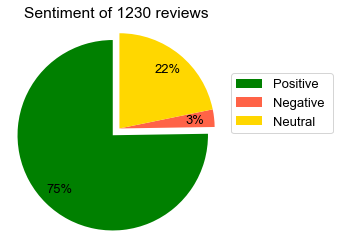

In [48]:
Pie_chart2(positive_perc,negative_perc,neutral_perc,"Sentiment of 1230 reviews")

In [49]:
purchased_df=data_lbl[data_lbl["Purchased Reviews"]==1]
purchased_df.head()

Purchased Reviews  Recommended Reviews  Rating of Reviews  \
0                  1.0                  1.0                  5   
14                 1.0                  1.0                  4   
18                 1.0                  1.0                  5   
30                 1.0                  1.0                  4   
133                1.0                  0.0                  1   

                                    Full Text Reviews   \
0                        sweet smooth taste every drop   
14   bought two bottles meiomi give one friend enjo...   
18                                 favorite chardonney   
30                                         great price   
133                                              tasty   

                            Title of Reviews   label  
0    I love the sweet smooth muscadine taste.      0  
14            Good Food without a cork screw.      1  
18                                Great price      0  
30                               Good Food...      1  
133                                 Drink mix      0

In [50]:
pos_purch,neg_purch,neut_purch=Label_percentage(purchased_df)

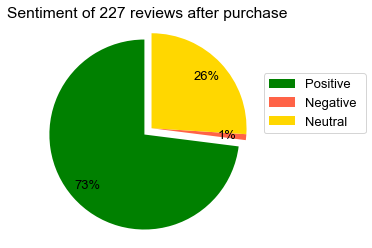

In [51]:
Pie_chart2(pos_purch,neg_purch,neut_purch,"Sentiment of 227 reviews after purchase")

In [52]:
b=purchased_df.groupby(["Rating of Reviews"])["Rating of Reviews"].count()


In [53]:
#b=b.sort_values()
#b[0]=0

In [54]:

b=b.to_dict()
#b.values()
b

{1: 4, 2: 2, 3: 7, 4: 30, 5: 184}

In [55]:
b.keys()
v={}
for i in b.keys():
    v[str(i)+" Stars"]=b[i]
    #print(b[i])

In [56]:
labels=list(v.keys())
values=list(v.values())

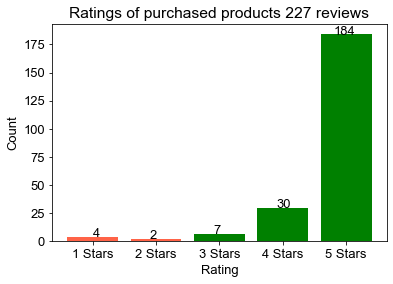

In [57]:
_=plt.bar(x=v.keys(),height=v.values(),color=['tomato', "tomato", 'green', "green", "green"],bottom=0)
_=plt.xlabel("Rating")  
#_=plt.yticks(list(v.values()))
_=plt.ylabel("Count")
_=plt.title("Ratings of purchased products "+str(len(purchased_df))+" reviews")
#plt.text(.002,208,male_perc)
xx=[.01,.9,1.9,2.9,3.8]
for i in range(5):
    plt.text(xx[i],values[i],values[i])

In [63]:
data.iloc[290]

Purchased Reviews                                            0
Recommended Reviews                                          1
Rating of Reviews                                            1
Full Text Reviews      never order two buck chuck better taste
Title of Reviews                                  do not order
label                                                        0
Name: 291, dtype: object

In [58]:
data_clnd=data_lbl

In [59]:
#type(data['label'][1])

In [60]:
#tokenize the reviews using clean_data function 

In [64]:
clean_df_n=clean_data(data_clnd)

0
['sweet', 'smooth', 'taste', 'every']
XXX
['sweet', 'smooth', 'taste', 'every']
1
['terrific', 'product', 'drops', 'straight', 'mixed', 'agave', 'nectar', 'difference', 'would', 'order']
XXX
['terrific', 'product', 'drops', 'straight', 'mixed', 'agave', 'nectar', 'difference', 'would', 'order']
2
['market', 'leaves', 'hoppy', 'aftertaste', 'approx', 'maintain', 'exercise', 'drinking', 'dayit', 'weight']
XXX
['market', 'leaves', 'hoppy', 'aftertaste', 'approx', 'maintain', 'exercise', 'drinking', 'dayit', 'weight']
3
['great', 'refreshing', 'taste', 'ingredients', 'nongmo']
XXX


D:\programs\anaconda\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


['great', 'refreshing', 'taste', 'ingredients', 'nongmo']
4
['purchased', 'mimosas', 'mimosas', 'delicious', 'found', 'california', 'champaign', 'tasteless', 'right', 'lesser', 'temperature', 'course', 'perignon', 'would', 'mimosas', 'anyway']
XXX
['purchased', 'mimosas', 'mimosas', 'delicious', 'found', 'california', 'champaign', 'tasteless', 'right', 'lesser', 'temperature', 'course', 'perignon', 'would', 'mimosas', 'anyway']
5
['first', 'trying']
XXX
['first', 'trying']
6
['great', 'tasting', 'smooth', 'blend', 'awesome', 'price']
XXX
['great', 'tasting', 'smooth', 'blend', 'awesome', 'price']
7
['decent', 'table', 'price', 'sweeter', 'spectrum']
XXX
['decent', 'table', 'price', 'sweeter', 'spectrum']
8
['buying', 'apothic', 'couple', 'years', 'blend', 'choice', 'smooth', 'reasonably', 'priced']
XXX
['buying', 'apothic', 'couple', 'years', 'blend', 'choice', 'smooth', 'reasonably', 'priced']
9
['expert', 'means', 'dinner', 'night', 'ticket', 'fruity', 'lovely', 'hubby', 'liked']
XXX

['searched', 'sangria', 'tasting', 'sweet', 'smooth', 'chilled', 'perfect', 'summers']
47
['purchase', 'every', 'started', 'disappear', 'sixbought', 'scared', 'something', 'might', 'reappear', 'please', 'reassure', 'continue', 'carry']
XXX
['purchase', 'every', 'started', 'disappear', 'sixbought', 'scared', 'something', 'might', 'reappear', 'please', 'reassure', 'continue', 'carry']
48
['taste']
XXX
['taste']
49
['wanted', 'gives', 'fruity', 'juicy', 'taste', 'without', 'alcohol', 'still', 'gives', 'cocktail', 'without', 'taste', 'stuff', 'picky', 'grandmother', 'loves']
XXX
['wanted', 'gives', 'fruity', 'juicy', 'taste', 'without', 'alcohol', 'still', 'gives', 'cocktail', 'without', 'taste', 'stuff', 'picky', 'grandmother', 'loves']
50
['sweetvery', 'refreshing', 'delicious']
XXX
['sweetvery', 'refreshing', 'delicious']
51
['favorite', 'riesling', 'spotted', 'bottle', 'delighted', 'usually', 'around', 'locations', 'buying', 'bottles', 'saved', 'dollars', 'thanks', 'target']
XXX
['favo

['moscato', 'purchasing', 'target', 'chill', 'fridge', 'enjoy', 'summer']
82
['tried', 'share', 'moscato', 'astis', 'smoothest', 'tried', 'sweet', 'fizzy', 'perfect', 'pretty', 'bottle', 'surprised', 'taste', 'disappointed']
XXX
['tried', 'share', 'moscato', 'astis', 'smoothest', 'tried', 'sweet', 'fizzy', 'perfect', 'pretty', 'bottle', 'surprised', 'taste', 'disappointed']
83
['bunch', 'target', 'buyer', 'please', 'bring']
XXX
['bunch', 'target', 'buyer', 'please', 'bring']
84
['boyfriend', 'brought', 'delighted', 'tasty', 'lasted', 'couple', 'weeks', 'better']
XXX
['boyfriend', 'brought', 'delighted', 'tasty', 'lasted', 'couple', 'weeks', 'better']
85
['fruity', 'satisfying', 'chardonnay', 'excellent', 'product', 'would', 'expect', 'bottle', 'quality']
XXX
['fruity', 'satisfying', 'chardonnay', 'excellent', 'product', 'would', 'expect', 'bottle', 'quality']
86
['fruity', 'sweet', 'taking', 'sparkling', 'great', 'mimosa', 'would', 'enjoy', 'wedding']
XXX
['fruity', 'sweet', 'taking', 

['favorite', 'bottle', 'design', 'cheap', 'lager']
123
['gluten', 'lower', 'calories', 'refreshing']
XXX
['gluten', 'lower', 'calories', 'refreshing']
124
['sought', 'memorabilia', 'collectors', 'especially', 'advise', 'locate', 'means', 'still', 'chance']
XXX
['sought', 'memorabilia', 'collectors', 'especially', 'advise', 'locate', 'means', 'still', 'chance']
125
['arrived', 'perfect', 'condition']
XXX
['arrived', 'perfect', 'condition']
126
['delicious', 'flavors', 'tastes', 'great', 'store']
XXX
['delicious', 'flavors', 'tastes', 'great', 'store']
127
['right', 'target', 'sierra', 'nevada', 'torpedo', 'outstanding', 'character', 'subtle', 'hints', 'fruit', 'strong', 'overly', 'bitter', 'aftertaste', 'excellent', 'relax', 'target', 'recently', 'began', 'carrying', 'could', 'enthused']
XXX
['right', 'target', 'sierra', 'nevada', 'torpedo', 'outstanding', 'character', 'subtle', 'hints', 'fruit', 'strong', 'overly', 'bitter', 'aftertaste', 'excellent', 'relax', 'target', 'recently', 'be

['burger', 'drinking', 'burger', 'years', 'favorite', 'burger', 'drink', 'regularly', 'usually', 'grape', 'juice', 'orange', 'juice', 'daiquiris', 'frozen', 'concoctions']
190
['titos', 'burger', 'drink', 'years']
XXX
['titos', 'burger', 'drink', 'years']
191
['drink', 'choice', 'really', 'enjoy', 'alone']
XXX
['drink', 'choice', 'really', 'enjoy', 'alone']
192
['pinnacle', 'making', 'martinis', 'family', 'years', 'father', 'discovered', 'years', 'someone', 'burger', 'south', 'winter', 'reasonable', 'price', 'youll']
XXX
['pinnacle', 'making', 'martinis', 'family', 'years', 'father', 'discovered', 'years', 'someone', 'burger', 'south', 'winter', 'reasonable', 'price', 'youll']
193
['whipped', 'creme', 'flavored', 'burger', 'fabulous', 'freezer', 'snifter', 'something', 'smooth', 'dinner', 'night']
XXX
['whipped', 'creme', 'flavored', 'burger', 'fabulous', 'freezer', 'snifter', 'something', 'smooth', 'dinner', 'night']
194
['burger', 'drinking', 'burger', 'years', 'favorite', 'burger', 

['superb', 'drink', 'getting', 'dressed', 'upscale', 'downtown', 'invite', 'friend', 'share', 'cocktail', 'elegant', 'drink', 'sophisticated', 'palate', 'cocktail', 'staple']
211
['personally', 'mixes', 'bought', 'entertaining', 'friends', 'night', 'extremely', 'impressed', 'smooth', 'balanced', 'everyone', 'loved', 'manhattans', 'whiskey', 'choice', 'artificial', 'flavors', 'fructose', 'syrups', 'either', 'sugar', 'honestly', 'probably', 'safer', 'using', 'liqueurs', 'market', 'bartender', 'telling', 'product']
XXX
['personally', 'mixes', 'bought', 'entertaining', 'friends', 'night', 'extremely', 'impressed', 'smooth', 'balanced', 'everyone', 'loved', 'manhattans', 'whiskey', 'choice', 'artificial', 'flavors', 'fructose', 'syrups', 'either', 'sugar', 'honestly', 'probably', 'safer', 'using', 'liqueurs', 'market', 'bartender', 'telling', 'product']
212
['manhattan', 'mixer', 'weekend', 'party', 'absolute', 'cocktails', 'delicious', 'simple', 'conversational', 'pieces', 'party']
XXX
['m

['usually', 'skeptical']
245
['hands', 'burgerdrinker', 'moscow', 'especially', 'copper', 'complaint', 'order', 'often', 'sweet', 'product', 'tastes', 'fresh', 'ginger', 'sugar', 'balanced', 'perfectly', 'great', 'crowd', 'pleaser', 'entertaining', 'people', 'think', 'scratch']
XXX
['hands', 'burgerdrinker', 'moscow', 'especially', 'copper', 'complaint', 'order', 'often', 'sweet', 'product', 'tastes', 'fresh', 'ginger', 'sugar', 'balanced', 'perfectly', 'great', 'crowd', 'pleaser', 'entertaining', 'people', 'think', 'scratch']
246
['never', 'thought', 'mixes', 'could', 'cocktail', 'enthusiast', 'sometime', 'never', 'makes', 'fantastic', 'drinks', 'comfort', 'without', 'emptying', 'wallet', 'friends', 'hooked', 'makes', 'perfect', 'fellow', 'cocktail', 'lovers', 'anytime', 'could', 'product', 'enough', 'stars']
XXX
['never', 'thought', 'mixes', 'could', 'cocktail', 'enthusiast', 'sometime', 'never', 'makes', 'fantastic', 'drinks', 'comfort', 'without', 'emptying', 'wallet', 'friends', '

['enough', 'overpowering']
XXX
['enough', 'overpowering']
288
['value', 'really', 'light', 'little', 'bitter', 'sweet']
XXX
['value', 'really', 'light', 'little', 'bitter', 'sweet']
289
['fallen', 'bread', 'reminds', 'great', 'sourdough', 'breads', 'fransisco', 'incredible', 'delicious', 'sourdough', 'flavor', 'perfect', 'texture', 'stock', 'every', 'shelf', 'walmart', 'always', 'please', 'regular', 'always', 'stock', 'bread', 'comes', 'close', 'quality']
XXX
['fallen', 'bread', 'reminds', 'great', 'sourdough', 'breads', 'fransisco', 'incredible', 'delicious', 'sourdough', 'flavor', 'perfect', 'texture', 'stock', 'every', 'shelf', 'walmart', 'always', 'please', 'regular', 'always', 'stock', 'bread', 'comes', 'close', 'quality']
290
['never', 'order', 'chuck', 'better', 'taste']
XXX
['never', 'order', 'chuck', 'better', 'taste']
291
['tried', 'batch', 'never', 'order']
XXX
['tried', 'batch', 'never', 'order']
292
['flavor', 'receiving', 'autodelivery']
XXX
['flavor', 'receiving', 'autod

['sweet', 'skeptical', 'ordering', 'without', 'tasting', 'first', 'ordered', 'thanks', 'kevin', 'oleary']
317
['ordered', 'bottle', 'meritage', 'moscata', 'foods', 'friends', 'favor', 'definitely', 'foods', 'called', 'thought', 'tasted', 'awhile', 'thoroughly', 'enjoying', 'finished', 'planned', 'order', 'bottle', 'varieties', 'thanks', 'kevin']
XXX
['ordered', 'bottle', 'meritage', 'moscata', 'foods', 'friends', 'favor', 'definitely', 'foods', 'called', 'thought', 'tasted', 'awhile', 'thoroughly', 'enjoying', 'finished', 'planned', 'order', 'bottle', 'varieties', 'thanks', 'kevin']
318
['ordered', 'white', 'zinfadel', 'bottle', 'selection', 'arrived', 'friday', 'absolutely', 'pleasure', 'tasting', 'husband', 'visited', 'nappa', 'valley', 'sonoma', 'foodries', 'years', 'kevin', 'oleary', 'bring', 'truly', 'inspired', 'certainly', 'company', 'yesterday', 'everyone', 'remarked', 'thank', 'wonderful', 'offering']
XXX
['ordered', 'white', 'zinfadel', 'bottle', 'selection', 'arrived', 'frid

['exceptionally', 'flavor']
337
['matter', 'years', 'various', 'tastingsjim', 'black', 'shoulders', 'matter', 'price']
XXX
['matter', 'years', 'various', 'tastingsjim', 'black', 'shoulders', 'matter', 'price']
338
['personally', 'turkey', 'drinker', 'cudos', 'producing', 'classy', 'commercial', 'right', 'spokesperson', 'classy']
XXX
['personally', 'turkey', 'drinker', 'cudos', 'producing', 'classy', 'commercial', 'right', 'spokesperson', 'classy']
339
['seriously', 'whats', 'great', 'great']
XXX
['seriously', 'whats', 'great', 'great']
340
['explanation', 'necessary']
XXX
['explanation', 'necessary']
341
['first', 'started', 'drinking', 'camping', 'didnt', 'carry', 'around', 'tried', 'first', 'cherry', 'tried', 'devils', 'hooked', 'since', 'usually', 'drpepper']
XXX
['first', 'started', 'drinking', 'camping', 'didnt', 'carry', 'around', 'tried', 'first', 'cherry', 'tried', 'devils', 'hooked', 'since', 'usually', 'drpepper']
342
['smoothest', 'foods', 'tasted', 'typically', 'drink', 'wo

['personally', 'turkey', 'drinker', 'cudos', 'producing', 'classy', 'commercial', 'right', 'spokesperson', 'classy']
383
['seriously', 'whats', 'great', 'great']
XXX
['seriously', 'whats', 'great', 'great']
384
['explanation', 'necessary']
XXX
['explanation', 'necessary']
385
['first', 'started', 'drinking', 'camping', 'didnt', 'carry', 'around', 'tried', 'first', 'cherry', 'tried', 'devils', 'hooked', 'since', 'usually', 'drpepper']
XXX
['first', 'started', 'drinking', 'camping', 'didnt', 'carry', 'around', 'tried', 'first', 'cherry', 'tried', 'devils', 'hooked', 'since', 'usually', 'drpepper']
386
['smoothest', 'foods', 'tasted', 'typically', 'drink', 'woodford', 'reserve', 'eagle', 'tried', 'bottle', 'every', 'weeks']
XXX
['smoothest', 'foods', 'tasted', 'typically', 'drink', 'woodford', 'reserve', 'eagle', 'tried', 'bottle', 'every', 'weeks']
387
['smooth']
XXX
['smooth']
388
['tried', 'black', 'first', 'tonight', 'smooth', 'whiskey', 'sours', 'awesome', 'thanks', 'awesome']
XXX
['

['great', 'electric', 'pressure', 'washer', 'scrubber', 'worked', 'great', 'patio']
419
['purchased', 'electric', 'model', 'avoid', 'another', 'engine', 'model', 'works', 'cleaning', 'patio', 'aggregate', 'steps', 'driveway', 'light', 'weight', 'store', 'priced', 'accordingly']
XXX
['purchased', 'electric', 'model', 'avoid', 'another', 'engine', 'model', 'works', 'cleaning', 'patio', 'aggregate', 'steps', 'driveway', 'light', 'weight', 'store', 'priced', 'accordingly']
420
['woman', 'doesnt', 'husband', 'something', 'operate', 'surprised', 'nicely', 'cleaned', 'composite', 'decking', 'oldcement', 'steps', 'green', 'black', 'stains', 'clean', 'scotts', 'outdoor', 'easily', 'attach', 'different', 'nozzles', 'attachments', 'hated', 'power', 'washer', 'trouble', 'lasts', 'value']
XXX
['woman', 'doesnt', 'husband', 'something', 'operate', 'surprised', 'nicely', 'cleaned', 'composite', 'decking', 'oldcement', 'steps', 'green', 'black', 'stains', 'clean', 'scotts', 'outdoor', 'easily', 'attac

['straight']
451
['great', 'price', 'great', 'ordered', 'online', 'picked', 'right']
XXX
['great', 'price', 'great', 'ordered', 'online', 'picked', 'right']
452
['smooth', 'sweet', 'would', 'sugar', 'added']
XXX
['smooth', 'sweet', 'would', 'sugar', 'added']
453
['delish', 'suggestion', 'bigger', 'bottle', 'handle']
XXX
['delish', 'suggestion', 'bigger', 'bottle', 'handle']
454
['everything', 'apple', 'taste', 'great', 'smooth', 'drinks', 'without', 'added', 'mixes']
XXX
['everything', 'apple', 'taste', 'great', 'smooth', 'drinks', 'without', 'added', 'mixes']
455
['hesitant', 'apple', 'trying', 'apple', 'whiskeys', 'disappointed', 'smooth', 'light', 'fruity']
XXX
['hesitant', 'apple', 'trying', 'apple', 'whiskeys', 'disappointed', 'smooth', 'light', 'fruity']
456
['apple', 'little', 'ginger', 'great', 'summer', 'refreshment']
XXX
['apple', 'little', 'ginger', 'great', 'summer', 'refreshment']
457
['makes', 'greatest', 'apple', 'martini']
XXX
['makes', 'greatest', 'apple', 'martini']
4

['lucky']
501
['makes', 'manhattan', 'perfect']
XXX
['makes', 'manhattan', 'perfect']
502
['bought', 'gallons', 'weeks', 'gallon', 'primarys', 'kegged', 'gallons', 'instructions', 'burger', 'spices', 'vanilla', 'slurry', 'vague', 'potion', 'store', 'mixed', 'fridge', 'fermented', 'turned', 'sanitized', 'mason', 'gallons', 'worth', 'potion', 'mixture', 'kegged', 'added', 'shook', 'vigorously', 'break', 'worked', 'first', 'foods', 'chunky', 'cleared', 'potion', 'taste', 'cider', 'upfront', 'pumkin', 'spice', 'hints', 'cinnamon', 'prominent', 'flavors', 'bottled', 'second', 'gallons', 'without', 'potionoverall', 'adding', 'extra', 'pound', 'dextrosei', 'expect', 'bottles', 'liking']
XXX
['bought', 'gallons', 'weeks', 'gallon', 'primarys', 'kegged', 'gallons', 'instructions', 'burger', 'spices', 'vanilla', 'slurry', 'vague', 'potion', 'store', 'mixed', 'fridge', 'fermented', 'turned', 'sanitized', 'mason', 'gallons', 'worth', 'potion', 'mixture', 'kegged', 'added', 'shook', 'vigorously', '

['taste']
529
['refreshing', 'drink', 'taste', 'great', 'summer', 'treat']
XXX
['refreshing', 'drink', 'taste', 'great', 'summer', 'treat']
530
['tastes', 'great']
XXX
['tastes', 'great']
531
['pricegreat', 'taste']
XXX
['pricegreat', 'taste']
532
['tastes', 'great']
XXX
['tastes', 'great']
533
['tasting', 'mixer', 'expensive', 'taste']
XXX
['tasting', 'mixer', 'expensive', 'taste']
534
['since', 'started', 'using', 'product', 'hardly', 'drink', 'margarita', 'calorie', 'mixers', 'fortunately', 'folks', 'walmart', 'starting', 'local', 'walmart', 'rarely', 'doesnt']
XXX
['since', 'started', 'using', 'product', 'hardly', 'drink', 'margarita', 'calorie', 'mixers', 'fortunately', 'folks', 'walmart', 'starting', 'local', 'walmart', 'rarely', 'doesnt']
535
['havent', 'tried', 'product', 'bought', 'gifts', 'teachers', 'planning', 'setting', 'teachers', 'choose', 'didnt', 'realize', 'bottle', 'individually', 'labeled', 'instead', 'labeling', 'flavor', 'directions', 'mixing', 'outside', 'labels'

['absolutely']
576
['explanation', 'necessary']
XXX
['explanation', 'necessary']
577
['little', 'sweet', 'taste', 'margarita']
XXX
['little', 'sweet', 'taste', 'margarita']
578
['recently', 'begun', 'enjoying', 'margaritas', 'havent', 'searching', 'different', 'pretty', 'margaritas', 'rocks', 'seems', 'really', 'trick', 'flavor', 'reason', 'picked', 'bottle', 'local', 'course', 'margaritas', 'thought', 'would', 'start', 'didnt', 'search', 'actually', 'decent', 'price', 'container', 'sturdy', 'cuervo', 'margaritas', 'although', 'think', 'would', 'shake', 'still', 'shaker', 'overall', 'taste', 'sweet', 'overly', 'powerful', 'senses', 'recently', 'mowed', 'cocktail', 'right', 'flavor', 'enjoy', 'summer', 'definitely', 'purchasing', 'future', 'maybe', 'adding', 'different', 'fruit', 'flavors', 'punch', 'notch', 'wrong', 'flavor', 'bottle']
XXX
['recently', 'begun', 'enjoying', 'margaritas', 'havent', 'searching', 'different', 'pretty', 'margaritas', 'rocks', 'seems', 'really', 'trick', 'fl

['trying', 'smooth', 'finish', 'stuff', 'exactly', 'looking']
620
['excellent', 'choice', 'never', 'locally']
XXX
['excellent', 'choice', 'never', 'locally']
621
['great', 'valve', 'product', 'excellent', 'enjoy', 'experimenting', 'bacics', 'coming']
XXX
['great', 'valve', 'product', 'excellent', 'enjoy', 'experimenting', 'bacics', 'coming']
622
['great', 'taste', 'fructose', 'syrup']
XXX
['great', 'taste', 'fructose', 'syrup']
623
['apparently', 'distributor', 'stopped', 'carrying', 'tried', 'mixes', 'tastes', 'thank', 'walmart', 'summer', 'porchsitting', 'complete']
XXX
['apparently', 'distributor', 'stopped', 'carrying', 'tried', 'mixes', 'tastes', 'thank', 'walmart', 'summer', 'porchsitting', 'complete']
624
['delio', 'problem', 'cooked', 'unevenly']
XXX
['delio', 'problem', 'cooked', 'unevenly']
625
['favorite', 'quickie']
XXX
['favorite', 'quickie']
626
['great', 'afternoon', 'snack']
XXX
['great', 'afternoon', 'snack']
627
['mother', 'turned', 'barefoot', 'riesling', 'years', 'r

['process']
XXX
['process']
649
['alright', 'detail']
XXX
['alright', 'detail']
650
['website']
XXX
['website']
651
['could', 'amazon', 'account']
XXX
['could', 'amazon', 'account']
652
['great']
XXX
['great']
653
[]
XXX
[]
654
['looking', 'forward', 'seeing', 'granddaughters', 'truck']
XXX
['looking', 'forward', 'seeing', 'granddaughters', 'truck']
655
['tried', 'oreillys', 'ordering', 'australia']
XXX
['tried', 'oreillys', 'ordering', 'australia']
656
['quick']
XXX
['quick']
657
['appletinis', 'taste', 'great', 'tried', 'others', 'nothing', 'compares', 'everyone', 'always', 'comments', 'bottle', 'sweet']
XXX
['appletinis', 'taste', 'great', 'tried', 'others', 'nothing', 'compares', 'everyone', 'always', 'comments', 'bottle', 'sweet']
658
['looking', 'everywhere', 'product', 'starting', 'think', 'would', 'tried', 'walmartcom', 'resort', 'thank', 'walmart']
XXX
['looking', 'everywhere', 'product', 'starting', 'think', 'would', 'tried', 'walmartcom', 'resort', 'thank', 'walmart']
659
['

['excellent']
702
['bloody']
XXX
['bloody']
703
['summer', 'become', 'favorite', 'reasonably', 'priced', 'enjoy']
XXX
['summer', 'become', 'favorite', 'reasonably', 'priced', 'enjoy']
704
['worked', 'great', 'loved']
XXX
['worked', 'great', 'loved']
705
['complaints', 'healthy', 'course']
XXX
['complaints', 'healthy', 'course']
706
['quick', 'serve', 'brings', 'smile', 'faces', 'pretty', 'value', 'quick', 'drink', 'product']
XXX
['quick', 'serve', 'brings', 'smile', 'faces', 'pretty', 'value', 'quick', 'drink', 'product']
707
['product', 'others', 'would', 'appealing', 'others', 'replaced', 'sugar', 'product', 'better', 'increase', 'price', 'would', 'deter', 'least', 'growth', 'organic', 'industry']
XXX
['product', 'others', 'would', 'appealing', 'others', 'replaced', 'sugar', 'product', 'better', 'increase', 'price', 'would', 'deter', 'least', 'growth', 'organic', 'industry']
708
['simply', 'clamato', 'simply', 'delicious', 'however', 'sodium', 'content', 'drink', 'anymore', 'sodium',

['absolute', 'tomato', 'juice', 'bloody', 'contains', 'juice', 'drink', 'called', 'digger', 'burger', 'worcestershire', 'sauce', 'lemon', 'juice', 'sauce', 'drink']
758
['canada', 'motts', 'clamato', 'juice', 'available', 'walmart', 'ceasar', 'without', 'difference', 'ceasar', 'clamato', 'juice', 'bloody', 'tomato', 'juice']
XXX
['canada', 'motts', 'clamato', 'juice', 'available', 'walmart', 'ceasar', 'without', 'difference', 'ceasar', 'clamato', 'juice', 'bloody', 'tomato', 'juice']
759
['didnt', 'tomato', 'juice', 'tried', 'anyway', 'pleasantly', 'surprised', 'refreshing', 'taste', 'whether', 'served', 'mixed', 'drink', 'excellent']
XXX
['didnt', 'tomato', 'juice', 'tried', 'anyway', 'pleasantly', 'surprised', 'refreshing', 'taste', 'whether', 'served', 'mixed', 'drink', 'excellent']
760
['clamoto', 'shrimp', 'cocteaus', 'drinks', 'freshness']
XXX
['clamoto', 'shrimp', 'cocteaus', 'drinks', 'freshness']
761
['clamato', 'alcohol', 'health', 'issues', 'virgin', 'drink', 'celery', 'coup

['flavor', 'great', 'product']
806
['cheapest', 'price', 'internet', 'shipping', 'wrong']
XXX
['cheapest', 'price', 'internet', 'shipping', 'wrong']
807
['inside', 'container', 'smells', 'similar', 'sugary', 'drink', 'access', 'blender', 'homemade', 'product', 'unavailable', 'decent', 'price', 'though', 'guest', 'seemed', 'caution', 'pouring', 'anything', 'bucket', 'carefully', 'inspect', 'bottom', 'bucket', 'spout', 'damage', 'bucket', 'uknowlingly', 'damaged', 'substantial', 'amount', 'margarita', 'dripped', 'freezer', 'cheers']
XXX
['inside', 'container', 'smells', 'similar', 'sugary', 'drink', 'access', 'blender', 'homemade', 'product', 'unavailable', 'decent', 'price', 'though', 'guest', 'seemed', 'caution', 'pouring', 'anything', 'bucket', 'carefully', 'inspect', 'bottom', 'bucket', 'spout', 'damage', 'bucket', 'uknowlingly', 'damaged', 'substantial', 'amount', 'margarita', 'dripped', 'freezer', 'cheers']
808
['taste', 'awesome']
XXX
['taste', 'awesome']
809
['daughters', 'weddin

['martinis', 'dirty', 'stuff', 'flavorful', 'olive', 'juice', 'tasted', 'olives', 'bodied', 'brinygo', 'ahead', 'youre', 'definitely', 'worth']
865
['always', 'loved', 'dirty', 'arrives', 'works', 'great', 'martinis']
XXX
['always', 'loved', 'dirty', 'arrives', 'works', 'great', 'martinis']
866
['everything', 'thought', 'would', 'would']
XXX
['everything', 'thought', 'would', 'would']
867
['dirty', 'martini']
XXX
['dirty', 'martini']
868
['dirty', 'dirty', 'martinis', 'found']
XXX
['dirty', 'dirty', 'martinis', 'found']
869
['staple', 'withoutmakes', 'dirty', 'tinis']
XXX
['staple', 'withoutmakes', 'dirty', 'tinis']
870
['dirty', 'martinis']
XXX
['dirty', 'martinis']
871
['right', 'dirty', 'martinis', 'dirty']
XXX
['right', 'dirty', 'martinis', 'dirty']
872
['tried', 'every', 'olive', 'juice', 'extremely', 'disappointed', 'threw', 'every', 'dirty']
XXX
['tried', 'every', 'olive', 'juice', 'extremely', 'disappointed', 'threw', 'every', 'dirty']
873
['great', 'available', 'locally']
XXX


['using', 'bloody', 'marys', 'years', 'could', 'stand', 'lower', 'price', 'dollar', 'match', 'clubs', 'price', 'stock', 'price', 'still', 'little', 'lower', 'retail', 'stores']
920
['bloody']
XXX
['bloody']
921
[]
XXX
[]
922
['zingy', 'bloody', 'additional', 'spices']
XXX
['zingy', 'bloody', 'additional', 'spices']
923
['ordered', 'buckets', 'opened', 'couple', 'buckets', 'holes', 'bottom', 'margarita']
XXX
['ordered', 'buckets', 'opened', 'couple', 'buckets', 'holes', 'bottom', 'margarita']
924
['ordered', 'buckets', 'opened', 'couple', 'buckets', 'holes', 'bottom', 'margarita']
XXX
['ordered', 'buckets', 'opened', 'couple', 'buckets', 'holes', 'bottom', 'margarita']
925
['definitely', 'tasting', 'convenient', 'portable']
XXX
['definitely', 'tasting', 'convenient', 'portable']
926
['really', 'tasty', 'ingredient', 'problem', 'drink', 'especially', 'frozen']
XXX
['really', 'tasty', 'ingredient', 'problem', 'drink', 'especially', 'frozen']
927
['product']
XXX
['product']
928
['online', 

['excellent', 'flavor', 'sweetsyrupy', 'mixes']
XXX
['excellent', 'flavor', 'sweetsyrupy', 'mixes']
967
['shaved', 'wedge', 'arrived', 'quickly']
XXX
['shaved', 'wedge', 'arrived', 'quickly']
968
['great', 'margarita', 'small', 'waste', 'great', 'taking']
XXX
['great', 'margarita', 'small', 'waste', 'great', 'taking']
969
['tasty', 'margaritas', 'ninja']
XXX
['tasty', 'margaritas', 'ninja']
970
['really', 'helps', 'digestion', 'going', 'mornings']
XXX
['really', 'helps', 'digestion', 'going', 'mornings']
971
['tasting']
XXX
['tasting']
972
['great', 'product', 'pricing', 'delivery']
XXX
['great', 'product', 'pricing', 'delivery']
973
['great', 'product', 'ounce', 'bottles', 'makes', 'great', 'fashion', 'splendamakes', 'calorie', 'drink']
XXX
['great', 'product', 'ounce', 'bottles', 'makes', 'great', 'fashion', 'splendamakes', 'calorie', 'drink']
974
['manhattens']
XXX
['manhattens']
975
['manhattens']
XXX
['manhattens']
976
['enjoying', 'original', 'years', 'started', 'mixing', 'slice'

['bought', 'great', 'flavorful', 'crispy', 'lightly', 'toasted', 'definitely']
1026
['first', 'trying', 'really']
XXX
['first', 'trying', 'really']
1027
['doesnt', 'nooks', 'crannies', 'price', 'really', 'enjoy']
XXX
['doesnt', 'nooks', 'crannies', 'price', 'really', 'enjoy']
1028
['great', 'cream', 'coconut', 'often', 'product', 'allows', 'amount', 'needed', 'taste', 'wonderful', 'drinks', 'burgers', 'never', 'complaint']
XXX
['great', 'cream', 'coconut', 'often', 'product', 'allows', 'amount', 'needed', 'taste', 'wonderful', 'drinks', 'burgers', 'never', 'complaint']
1029
['store', 'different', 'foods', 'leaves', 'finished', 'drinking', 'loved', 'enjoy', 'bitter', 'foods', 'pretty', 'tried', 'cheaper', 'bitter', 'foods', 'price', 'point', 'quality', 'great', 'definitely', 'suggest', 'giving', 'might']
XXX
['store', 'different', 'foods', 'leaves', 'finished', 'drinking', 'loved', 'enjoy', 'bitter', 'foods', 'pretty', 'tried', 'cheaper', 'bitter', 'foods', 'price', 'point', 'quality', 

['bitters', 'great', 'dropper', 'bottle', 'estuff', 'kinds', 'cocktails', 'complaint', 'boston', 'bitahs', 'leaked', 'transit', 'entire', 'smelled', 'great', 'bottle', 'remaining', 'still', 'bottle', 'order', 'complaining']
1058
['spice', 'average', 'cocktail', 'signature', 'cocktail', 'youll', 'enjoy']
XXX
['spice', 'average', 'cocktail', 'signature', 'cocktail', 'youll', 'enjoy']
1059
['bittera', 'drinks', 'gives', 'extra']
XXX
['bittera', 'drinks', 'gives', 'extra']
1060
['people', 'think', 'things', 'bitters', 'muddled', 'fruit', 'difference', 'drink', 'couldnt', 'wrong', 'habenero', 'shrub', 'bitter', 'dimension', 'cocktail', 'anyone', 'serious', 'drink']
XXX
['people', 'think', 'things', 'bitters', 'muddled', 'fruit', 'difference', 'drink', 'couldnt', 'wrong', 'habenero', 'shrub', 'bitter', 'dimension', 'cocktail', 'anyone', 'serious', 'drink']
1061
['product', 'using', 'almost', 'nightly', 'cocktails']
XXX
['product', 'using', 'almost', 'nightly', 'cocktails']
1062
['bitters', '

['specifically', 'xocolatl', 'bitters', 'amazon', 'seems', 'lumped', 'reviews', 'together', 'tasted', 'person', 'bitters', 'oxbow', 'market', 'excited', 'easily', 'amazon', 'drops', 'drink', 'makes', 'happy', 'subtle', 'chocolate', 'often', 'bittersour', 'mixers', 'pushes', 'drink', 'bitter', 'definitely', 'finish', 'bottle', 'little']
1110
['great', 'bitters', 'searching', 'creative', 'cocktails', 'bitters', 'highly', 'recommended']
XXX
['great', 'bitters', 'searching', 'creative', 'cocktails', 'bitters', 'highly', 'recommended']
1111
['flavor', 'lingering', 'balanced', 'perfectly', 'bitter', 'quality', 'imagine', 'drinking', 'slide', 'cocoa', 'runner', 'without', 'splash', 'amazing']
XXX
['flavor', 'lingering', 'balanced', 'perfectly', 'bitter', 'quality', 'imagine', 'drinking', 'slide', 'cocoa', 'runner', 'without', 'splash', 'amazing']
1112
['great', 'margarita', 'tommy', 'bahamas', 'makes']
XXX
['great', 'margarita', 'tommy', 'bahamas', 'makes']
1113
['bitters', 'taste', 'great', 

['great', 'flavor', 'beverage', 'suggest', 'trying', 'burger', 'looking', 'forward', 'using', 'drink', 'liqueur']
1142
['habanero', 'bitters', 'great', 'version', 'margarita', 'traditionally', 'tabasco', 'least', 'vinegar', 'flavor', 'tabascoalso', 'bitters', 'bitter', 'favorite', 'cocktail', 'itgreat', 'stuff']
XXX
['habanero', 'bitters', 'great', 'version', 'margarita', 'traditionally', 'tabasco', 'least', 'vinegar', 'flavor', 'tabascoalso', 'bitters', 'bitter', 'favorite', 'cocktail', 'itgreat', 'stuff']
1143
['kinds', 'drinks', 'really', 'great', 'spice', 'notes', 'exotic', 'flavor', 'based', 'drinks', 'would', 'strong', 'nutmeg', 'folks', 'personally', 'tough', 'bitters', 'drinks', 'beyond', 'angostura', 'great', 'addition', 'people', 'tropical', 'themed', 'cocktails']
XXX
['kinds', 'drinks', 'really', 'great', 'spice', 'notes', 'exotic', 'flavor', 'based', 'drinks', 'would', 'strong', 'nutmeg', 'folks', 'personally', 'tough', 'bitters', 'drinks', 'beyond', 'angostura', 'great', '

['found', 'health', 'store', 'loved', 'tasting', 'healthy', 'giving', 'gifts', 'friends', 'family']
1166
['fruit', 'frozen', 'fruit', 'drinks', 'simple', 'syrup', 'sweetener']
XXX
['fruit', 'frozen', 'fruit', 'drinks', 'simple', 'syrup', 'sweetener']
1167
['tastes', 'juice', 'makes', 'unwind', 'perfect', 'glass', 'easier', 'local', 'store', 'often', 'stock']
XXX
['tastes', 'juice', 'makes', 'unwind', 'perfect', 'glass', 'easier', 'local', 'store', 'often', 'stock']
1168
['bottles', 'pretty', 'havent', 'opened', 'picture', 'emoji', 'delivery']
XXX
['bottles', 'pretty', 'havent', 'opened', 'picture', 'emoji', 'delivery']
1169
['whiskey', 'lover', 'imbibing', 'dinner', 'hubby', 'suggested', 'trying', 'happy', 'product', 'walmart', 'supercenter', 'first', 'taste', 'great', 'difference', 'taste', 'slightly', 'higher', 'price', 'prior', 'purchasing', 'walmart', 'wasnt', 'aware', 'carried', 'mixers', 'foolish', 'everything', 'paying', 'bottle', 'stores', 'walmart', 'believe', 'is288', 'stocke

['consider', 'lover', 'decided', 'finally', 'order', 'mixed', 'whites', 'trying', 'variety', 'regret', 'decision', 'horrible', 'arent', 'either', 'arent', 'foods', 'serve', 'anyone', 'drink', 'alone', 'purchase', 'sweet', 'doubt', 'taste', 'described', 'sweet', 'chardonnay', 'strangest', 'tasting', 'chardonnay', 'tasted', 'described', 'guess', 'chardonnay', 'pinot', 'expert', 'repeatedly', 'mispronounced', 'bland', 'cabernet', 'sauvingnon', 'supposed', 'bunch', 'private', 'reserve', 'turned', 'disappointing', 'foods', 'touted', 'retail', 'value', 'bottle', 'taste', 'bottle', 'exactly', 'works', 'something', 'sounds', 'probably', 'lessons', 'learned']
1186
['variety', 'offered', 'sweet', 'pinot', 'average', 'nothing', 'special', 'outstanding', 'wouldnäôt', 'chardonnay', 'awfuläî', 'maybe', 'bottle', 'opened', 'immediately', 'smelled', 'spoiled', 'tasted', 'wound', 'pouring', 'drain', 'hoping', 'bottles', 'arenäôt', 'rotten', 'tried', 'itäôs', 'favorite', 'disappointedäîhoping', 'weäôll'

['wonderful', 'taste', 'divine']
1210
['sweet', 'perfect', 'summer']
XXX
['sweet', 'perfect', 'summer']
1211
['perfect', 'dirty', 'martini', 'saltiness']
XXX
['perfect', 'dirty', 'martini', 'saltiness']
1212
['dirty', 'martini', 'makes', 'perfect', 'drink', 'price', 'couldnt', 'lower', 'thank']
XXX
['dirty', 'martini', 'makes', 'perfect', 'drink', 'price', 'couldnt', 'lower', 'thank']
1213
['makes', 'excellent', 'dirty', 'martini', 'highly', 'recommend']
XXX
['makes', 'excellent', 'dirty', 'martini', 'highly', 'recommend']
1214
['coffee', 'medium', 'roast', 'natural', 'ingredients', 'ingredients', 'watercoffee', 'extractsugarmilk', 'powdersoy', 'lecithin', 'emulsifier']
XXX
['coffee', 'medium', 'roast', 'natural', 'ingredients', 'ingredients', 'watercoffee', 'extractsugarmilk', 'powdersoy', 'lecithin', 'emulsifier']
1215
['surprised', 'light', 'bubbly', 'variety', 'foods', 'price', 'point', 'makes', 'great', 'sharing', 'friends', 'alike']
XXX
['surprised', 'light', 'bubbly', 'variety',

In [66]:
#removing [] from reviews
for i in range(1230):
    n=clean_df_n["Full Text Reviews "][i]
    n=n.replace("[","")
    n=n.replace("]","")
    clean_df_n["Full Text Reviews "][i]=n
    

D:\programs\anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [67]:
clean_df_n.head()

Purchased Reviews  Recommended Reviews  Rating of Reviews  \
0                1.0                  1.0                  5   
1                0.0                  1.0                  5   
2                0.0                  1.0                  5   
3                0.0                  1.0                  5   
4                0.0                  1.0                  5   

                                  Full Text Reviews   \
0                'sweet', 'smooth', 'taste', 'every'   
1  'terrific', 'product', 'drops', 'straight', 'm...   
2  'market', 'leaves', 'hoppy', 'aftertaste', 'ap...   
3  'great', 'refreshing', 'taste', 'ingredients',...   
4  'purchased', 'mimosas', 'mimosas', 'delicious'...   

                          Title of Reviews   label  
0  I love the sweet smooth muscadine taste.      0  
1                                Delicious!      1  
2                   Hoppy! Best Hoppy Food.      1  
3                           Love This Brew!      1  
4                      Actually Quite Tasty     -1

In [240]:
#saving the dataframe of tokenized reviews 

In [69]:
clean_df_n.to_csv(r"data//data_reviews_cleaned",index=False)

In [241]:
#retrieving the dataframe of tokenized reviews 

In [70]:
reviews_clnd=pd.read_csv(r"data//data_reviews_cleaned_")

In [71]:
reviews_clnd.head()

Purchased Reviews  Recommended Reviews  Rating of Reviews  \
0                1.0                  1.0                  5   
1                NaN                  NaN                  5   
2                0.0                  1.0                  5   
3                0.0                  1.0                  5   
4                0.0                  1.0                  5   

                                  Full Text Reviews   \
0                'sweet', 'smooth', 'taste', 'every'   
1  'terrific', 'product', 'drops', 'straight', 'm...   
2  'market', 'leaves', 'hoppy', 'aftertaste', 'ap...   
3      'great', 'refreshing', 'taste', 'ingredients'   
4  'purchased', 'mimosas', 'mimosas', 'delicious'...   

                          Title of Reviews   label  
0  I love the sweet smooth muscadine taste.      0  
1                                Delicious!      1  
2                   Hoppy! Best Hoppy Food.      1  
3                           Love This Brew!      0  
4                      Actually Quite Tasty      1

In [243]:
#plotting word cloud using word_cloud function 

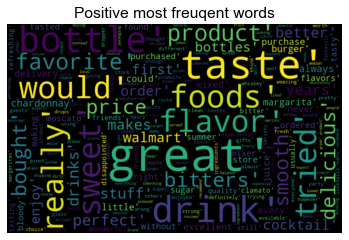

In [72]:
_=word_cloud(reviews_clnd,1)

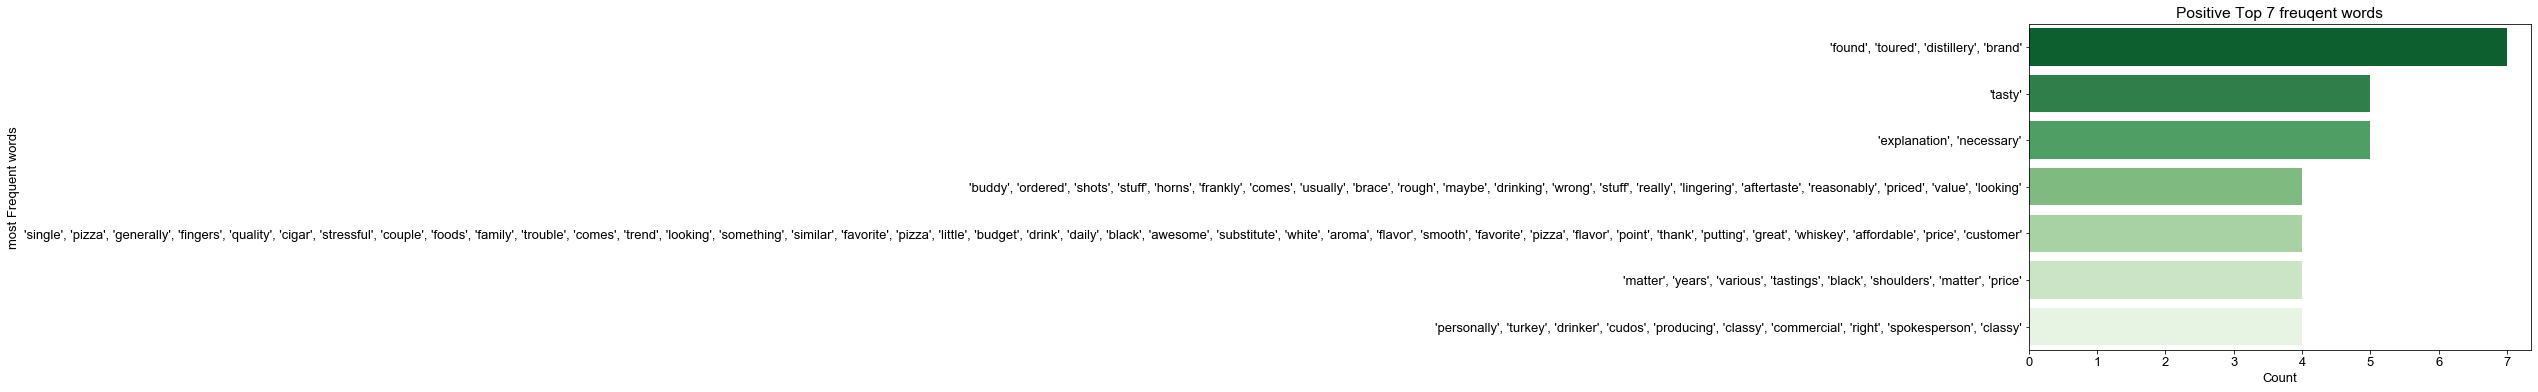

In [73]:
#plotting bar graph of top positive 7 frequent words 
_=words_freq_plot_sent(reviews_clnd,1)